In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
from keras.datasets import mnist
from keras import backend as K
import matplotlib.pyplot as plt
from keras.models import load_model,Model
import random

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [26]:
# 归一化处理
x_train = x_train / 255
x_test = x_test / 255

In [27]:
model = load_model('mnist_model.h5')

In [38]:
result = model.predict_classes(x_test[0].reshape(1,784))
print(result)
print(model.predict(x_test[0].reshape(1,784)))

[7]
[[6.57371202e-05 2.19948943e-05 7.26706698e-04 1.10585208e-03
  1.05678691e-05 1.16613046e-04 3.81415589e-07 9.97410119e-01
  3.85511048e-05 5.03525545e-04]]


In [5]:
layer_model = Model(inputs=model.input, outputs=model.layers[4].output)
feature=layer_model.predict(x_test[1].reshape(1,784))
print(feature)

[[2.71537807e-03 4.60730225e-04 9.69340861e-01 9.51941963e-03
  1.75056675e-06 4.71136486e-03 1.13870185e-02 6.00163230e-06
  1.85584708e-03 1.78185178e-06]]


In [5]:
x_train.shape

(60000, 28, 28)

5


253

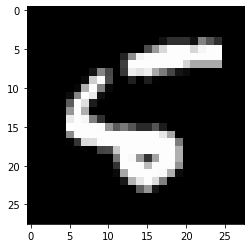

In [6]:
plt.imshow(x_test[8],cmap='gray')
print(y_test[8])
x_test[8,6,17]

In [7]:
result = model.predict_classes(x_test[8].reshape(1,784))
result

array([6], dtype=int64)

In [60]:
import copy
x_test_tmp = copy.deepcopy(x_test)
len(x_test_tmp)

10000

In [61]:
x_test_tmp.shape

(10000, 28, 28)

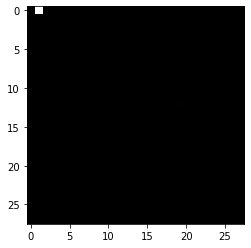

In [43]:
x_test_tmp[0,1] = 1
result = model.predict_classes(x_test_tmp.reshape(1,784))
result
plt.imshow(x_test_tmp,cmap='gray')
plt.show()

In [76]:
count = 0 
for index in range(10):  # 使用测试集的100张图片进行遍历攻击
    result = model.predict_classes(x_test[index].reshape(1,784))
    if result != y_test[index]:  # 剔除模型分类出错的图片
        count += 1
        continue
    else:
        # 每张图片28*28 = 784 个像素点，每个点的值只改成0,255两种情况
        for i in range(28):
            for j in range(28):
                for k in [0,255]:
                    #k=random.randint(0,254)
                    x_test_tmp[index,i,j] = k/255
                    result[0] = model.predict_classes(x_test_tmp[index].reshape(1,784))
                    if result[0] != y_test[index]:
                            print("predict:",result[0])
                            print("true:",y_test[index])
                            print((index,i,j,k))
                            plt.imshow(x_test_tmp[index],cmap='gray')
                            plt.show()
                    x_test_tmp = copy.deepcopy(x_test)
print(count) # 285个


1


In [22]:
for index in range(10):  # 使用测试集的10张图片进行随机攻击
        i = random.randint(0, 27)
        j = random.randint(0, 27)
        x_test_tmp[index,i,j] = 255
        result = model.predict_classes(x_test_tmp[index].reshape(1,784))
        res = model.predict(x_test_tmp[index].reshape(1,784))
        print("predict:",res[0])
        print("predict:",result[0])
        print("true:",y_test[index])
        print((index,i,j))
        x_test_tmp = copy.deepcopy(x_test)

predict: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
predict: 7
true: 7
(0, 8, 24)
predict: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
predict: 2
true: 2
(1, 24, 3)
predict: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
predict: 1
true: 1
(2, 26, 21)
predict: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
predict: 0
true: 0
(3, 3, 21)
predict: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
predict: 4
true: 4
(4, 26, 1)
predict: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
predict: 1
true: 1
(5, 12, 27)
predict: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
predict: 4
true: 4
(6, 22, 25)
predict: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
predict: 9
true: 9
(7, 11, 7)
predict: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
predict: 6
true: 5
(8, 26, 5)
predict: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
predict: 9
true: 9
(9, 23, 19)


In [86]:
for index in range(1):  # 输出第一张测试图片更改的所有像素点
        for i in range(28):
            for j in range(28):
                    x_test_tmp[index,i,j] = random.randint(0,254)/255
                    result = model.predict_classes(x_test_tmp[index].reshape(1,784))
                    res = model.predict(x_test_tmp[index].reshape(1,784))
                    if result[0] != y_test[index]:
                        plt.imshow(x_test_tmp[index],cmap='gray')
                        plt.show()
                        print("predict:",res[0])
                        print("predict:",result[0])
                        print("true:",y_test[index])
                        print((index,i,j))
                    x_test_tmp = copy.deepcopy(x_test)

In [22]:
for index in range(10):    # 使用测试集的10张图片进行遍历攻击
        for i in range(28):
            for j in range(28):
                    x_test_tmp[index,i,j] = 255
                    result = model.predict_classes(x_test_tmp[index].reshape(1,784))
                    if result[0] != y_test[index]:
                        print("predict:",result[0])
                        print("true:",y_test[index])
                        print((index,i,j,k))
                    x_test_tmp = copy.deepcopy(x_test)

predict: 6
true: 5
(8, 0, 0, 0)
predict: 6
true: 5
(8, 0, 1, 0)
predict: 6
true: 5
(8, 0, 2, 0)
predict: 6
true: 5
(8, 0, 3, 0)
predict: 6
true: 5
(8, 0, 4, 0)
predict: 6
true: 5
(8, 0, 5, 0)
predict: 6
true: 5
(8, 0, 6, 0)
predict: 6
true: 5
(8, 0, 7, 0)
predict: 6
true: 5
(8, 0, 8, 0)
predict: 6
true: 5
(8, 0, 9, 0)
predict: 6
true: 5
(8, 0, 10, 0)
predict: 6
true: 5
(8, 0, 11, 0)
predict: 6
true: 5
(8, 0, 12, 0)
predict: 6
true: 5
(8, 0, 13, 0)
predict: 6
true: 5
(8, 0, 14, 0)
predict: 6
true: 5
(8, 0, 15, 0)
predict: 6
true: 5
(8, 0, 16, 0)
predict: 6
true: 5
(8, 0, 17, 0)
predict: 6
true: 5
(8, 0, 18, 0)
predict: 6
true: 5
(8, 0, 19, 0)
predict: 6
true: 5
(8, 0, 20, 0)
predict: 6
true: 5
(8, 0, 21, 0)
predict: 6
true: 5
(8, 0, 22, 0)
predict: 6
true: 5
(8, 0, 23, 0)
predict: 6
true: 5
(8, 0, 24, 0)
predict: 6
true: 5
(8, 0, 25, 0)
predict: 6
true: 5
(8, 0, 26, 0)
predict: 6
true: 5
(8, 0, 27, 0)
predict: 6
true: 5
(8, 1, 0, 0)
predict: 6
true: 5
(8, 1, 1, 0)
predict: 6
true: 5
(8,

predict: 6
true: 5
(8, 8, 27, 0)
predict: 6
true: 5
(8, 9, 0, 0)
predict: 6
true: 5
(8, 9, 1, 0)
predict: 6
true: 5
(8, 9, 2, 0)
predict: 6
true: 5
(8, 9, 3, 0)
predict: 6
true: 5
(8, 9, 4, 0)
predict: 6
true: 5
(8, 9, 5, 0)
predict: 6
true: 5
(8, 9, 6, 0)
predict: 6
true: 5
(8, 9, 7, 0)
predict: 6
true: 5
(8, 9, 8, 0)
predict: 6
true: 5
(8, 9, 9, 0)
predict: 6
true: 5
(8, 9, 10, 0)
predict: 6
true: 5
(8, 9, 11, 0)
predict: 6
true: 5
(8, 9, 12, 0)
predict: 6
true: 5
(8, 9, 13, 0)
predict: 6
true: 5
(8, 9, 14, 0)
predict: 6
true: 5
(8, 9, 15, 0)
predict: 6
true: 5
(8, 9, 16, 0)
predict: 6
true: 5
(8, 9, 17, 0)
predict: 6
true: 5
(8, 9, 18, 0)
predict: 6
true: 5
(8, 9, 19, 0)
predict: 6
true: 5
(8, 9, 20, 0)
predict: 6
true: 5
(8, 9, 21, 0)
predict: 6
true: 5
(8, 9, 22, 0)
predict: 6
true: 5
(8, 9, 23, 0)
predict: 6
true: 5
(8, 9, 24, 0)
predict: 6
true: 5
(8, 9, 25, 0)
predict: 6
true: 5
(8, 9, 26, 0)
predict: 6
true: 5
(8, 9, 27, 0)
predict: 6
true: 5
(8, 10, 0, 0)
predict: 6
true: 5
(

(8, 17, 22, 0)
predict: 6
true: 5
(8, 17, 23, 0)
predict: 6
true: 5
(8, 17, 24, 0)
predict: 6
true: 5
(8, 17, 25, 0)
predict: 6
true: 5
(8, 17, 26, 0)
predict: 6
true: 5
(8, 17, 27, 0)
predict: 6
true: 5
(8, 18, 0, 0)
predict: 6
true: 5
(8, 18, 1, 0)
predict: 6
true: 5
(8, 18, 2, 0)
predict: 6
true: 5
(8, 18, 3, 0)
predict: 6
true: 5
(8, 18, 4, 0)
predict: 6
true: 5
(8, 18, 5, 0)
predict: 6
true: 5
(8, 18, 6, 0)
predict: 6
true: 5
(8, 18, 7, 0)
predict: 6
true: 5
(8, 18, 8, 0)
predict: 6
true: 5
(8, 18, 9, 0)
predict: 6
true: 5
(8, 18, 10, 0)
predict: 6
true: 5
(8, 18, 11, 0)
predict: 6
true: 5
(8, 18, 12, 0)
predict: 6
true: 5
(8, 18, 13, 0)
predict: 6
true: 5
(8, 18, 14, 0)
predict: 6
true: 5
(8, 18, 15, 0)
predict: 6
true: 5
(8, 18, 16, 0)
predict: 6
true: 5
(8, 18, 17, 0)
predict: 6
true: 5
(8, 18, 18, 0)
predict: 6
true: 5
(8, 18, 19, 0)
predict: 6
true: 5
(8, 18, 20, 0)
predict: 6
true: 5
(8, 18, 21, 0)
predict: 6
true: 5
(8, 18, 22, 0)
predict: 6
true: 5
(8, 18, 23, 0)
predict: 

predict: 6
true: 5
(8, 26, 15, 0)
predict: 6
true: 5
(8, 26, 16, 0)
predict: 6
true: 5
(8, 26, 17, 0)
predict: 6
true: 5
(8, 26, 18, 0)
predict: 6
true: 5
(8, 26, 19, 0)
predict: 6
true: 5
(8, 26, 20, 0)
predict: 6
true: 5
(8, 26, 21, 0)
predict: 6
true: 5
(8, 26, 22, 0)
predict: 6
true: 5
(8, 26, 23, 0)
predict: 6
true: 5
(8, 26, 24, 0)
predict: 6
true: 5
(8, 26, 25, 0)
predict: 6
true: 5
(8, 26, 26, 0)
predict: 6
true: 5
(8, 26, 27, 0)
predict: 6
true: 5
(8, 27, 0, 0)
predict: 6
true: 5
(8, 27, 1, 0)
predict: 6
true: 5
(8, 27, 2, 0)
predict: 6
true: 5
(8, 27, 3, 0)
predict: 6
true: 5
(8, 27, 4, 0)
predict: 6
true: 5
(8, 27, 5, 0)
predict: 6
true: 5
(8, 27, 6, 0)
predict: 6
true: 5
(8, 27, 7, 0)
predict: 6
true: 5
(8, 27, 8, 0)
predict: 6
true: 5
(8, 27, 9, 0)
predict: 6
true: 5
(8, 27, 10, 0)
predict: 6
true: 5
(8, 27, 11, 0)
predict: 6
true: 5
(8, 27, 12, 0)
predict: 6
true: 5
(8, 27, 13, 0)
predict: 6
true: 5
(8, 27, 14, 0)
predict: 6
true: 5
(8, 27, 15, 0)
predict: 6
true: 5
(8, 2

In [85]:
count = 0   
for index in range(100):  # 使用测试集的100张图片进行随机三像素攻击
    result = model.predict_classes(x_test[index].reshape(1,784))
    if result != y_test[index]:  # 剔除模型分类出错的图片
        count += 1
        continue
    else:
        i = random.randint(0, 27)
        j = random.randint(0, 27)
        q = random.randint(0, 27)
        w = random.randint(0, 27)
        a = random.randint(0, 27)
        s = random.randint(0, 27)
        x_test_tmp[index,i,j] = 1
        x_test_tmp[index,q,w] = 1
        x_test_tmp[index,a,s] = 1
        result = model.predict_classes(x_test_tmp[index].reshape(1,784))
        res = model.predict(x_test_tmp[index].reshape(1,784))
        if result[0] != y_test[index]:
             plt.imshow(x_test_tmp[index],cmap='gray')
             plt.show()
             print("predict:",res[0])
             print("predict:",result[0])
             print("true:",y_test[index])
             #print((index,i,j,q,w,a,s))
        x_test_tmp = copy.deepcopy(x_test)
print(count)

5


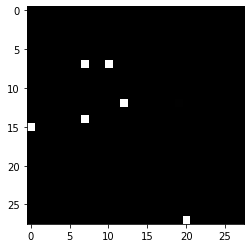

predict: [0.0000000e+00 0.0000000e+00 0.0000000e+00 2.8888534e-30 1.8818040e-26
 1.0000000e+00 0.0000000e+00 2.1886457e-08 0.0000000e+00 0.0000000e+00]
predict: 5
true: 7
(0, 27, 20, 7, 10, 14, 7, 7, 7, 15, 0, 12, 12)


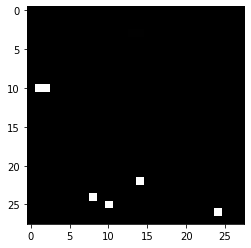

predict: [6.813325e-23 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 2.897683e-30 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00]
predict: 7
true: 2
(1, 26, 24, 22, 14, 10, 2, 24, 8, 25, 10, 10, 1)


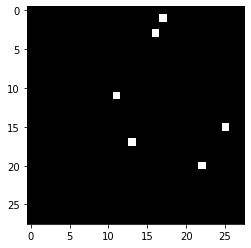

predict: [0.0000000e+00 1.3685192e-04 8.6609095e-01 0.0000000e+00 0.0000000e+00
 1.3377224e-01 2.1891776e-16 4.4367776e-15 2.0439762e-36 0.0000000e+00]
predict: 2
true: 1
(2, 20, 22, 3, 16, 1, 17, 15, 25, 11, 11, 17, 13)


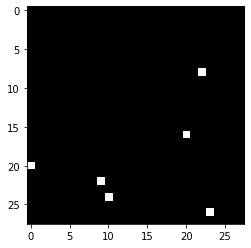

predict: [4.4023792e-34 0.0000000e+00 0.0000000e+00 1.9082116e-25 0.0000000e+00
 1.0000000e+00 0.0000000e+00 7.0554181e-16 0.0000000e+00 0.0000000e+00]
predict: 5
true: 0
(3, 22, 9, 24, 10, 20, 0, 8, 22, 26, 23, 16, 20)


KeyboardInterrupt: 

In [68]:
count = 0   
for index in range(100):  # 使用测试集的100张图片进行随机三像素攻击
    result = model.predict_classes(x_test[index].reshape(1,784))
    if result != y_test[index]:  # 剔除模型分类出错的图片
        count += 1
        continue
    else:
        i = random.randint(0, 27)
        j = random.randint(0, 27)
        q = random.randint(0, 27)
        w = random.randint(0, 27)
        a = random.randint(0, 27)
        s = random.randint(0, 27)
        z = random.randint(0, 27)
        x = random.randint(0, 27)
        e = random.randint(0, 27)
        r = random.randint(0, 27)
        d = random.randint(0, 27)
        f = random.randint(0, 27)
        x_test_tmp[index,i,j] = 1
        x_test_tmp[index,q,w] = 1
        x_test_tmp[index,a,s] = 1
        x_test_tmp[index,z,x] = 1
        x_test_tmp[index,e,r] = 1
        x_test_tmp[index,d,f] = 1
        result = model.predict_classes(x_test_tmp[index].reshape(1,784))
        res = model.predict(x_test_tmp[index].reshape(1,784))
        if result[0] != y_test[index]:
             plt.imshow(x_test_tmp[index],cmap='gray')
             plt.show()
             print("predict:",res[0])
             print("predict:",result[0])
             print("true:",y_test[index])
             print((index,i,j,q,w,a,s,z,x,e,r,d,f))
        x_test_tmp = copy.deepcopy(x_test)
print(count)